### Predict patient will survive or not with the given data parameters. This is a classification problem. 


### Dataset :Echocardiogram.data

This is Echocardiogram Dataset. This has published on 28 February 1989 in Miami. The donor of this dataset was Steven Salzberg and collector of this dataset was Dr. Evlin Kinney. Data source is uci.edu.
What am I going to predict? Is patient still alive or dead?
Which categories of machine learning to use?
- Supervised learning
- Unsupervised learning
- Semi- supervised learning


There is an outcome we are trying to predict - Supervised learning.

These are the steps to classify the survival rate of the patient.

- 1.Find the data 
- 2.Apply a data science model 
- 3.Review the results 

In [455]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from collections import Counter
from sklearn.metrics import *
import seaborn as sns; sns.set(font_scale=1.2)

In [456]:
#Loading your dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data"

In [457]:
Echocardiogram_df = pd.read_csv(url, header= None, error_bad_lines=False, sep=',')
col = ["survival ", "still-alive", "age-at-heart-attack", "pericardial-effusion","fractional-shortening", "E-point septal separation", "left ventricular end-diastolic", "wall-motion-score","wall-motion-index","mult","name ",  "group ",  "alive-at-1" ]
Echocardiogram_df.columns = col
print ('Check first 5 rows of the table ')
print(Echocardiogram_df.head())

Check first 5 rows of the table 
  survival   still-alive age-at-heart-attack  pericardial-effusion  \
0        11            0                  71                     0   
1        19            0                  72                     0   
2        16            0                  55                     0   
3        57            0                  60                     0   
4        19            1                  57                     0   

  fractional-shortening E-point septal separation  \
0                 0.260                         9   
1                 0.380                         6   
2                 0.260                         4   
3                 0.253                    12.062   
4                 0.160                        22   

  left ventricular end-diastolic wall-motion-score wall-motion-index   mult  \
0                          4.600                14                 1      1   
1                          4.100                14             1.700 

b'Skipping line 50: expected 13 fields, saw 14\n'


In [458]:
# check the last 5 rows
print ('Check Last 5 rows of the table ')
print(Echocardiogram_df.tail())

Check Last 5 rows of the table 
    survival   still-alive age-at-heart-attack  pericardial-effusion  \
126       7.5            1                  64                     0   
127        41            0                  64                     0   
128        36            0                  69                     0   
129        22            0                  57                     0   
130        20            0                  62                     0   

    fractional-shortening E-point septal separation  \
126                  0.24                      12.9   
127                  0.28                      5.40   
128                  0.20                      7.00   
129                  0.14                      16.1   
130                  0.15                         0   

    left ventricular end-diastolic wall-motion-score wall-motion-index   mult  \
126                           4.72                12                 1  0.857   
127                           5.47        

In [459]:
# check the total number of rows and column
print ('Print total number of rows and columns ')
print (Echocardiogram_df.shape)

Print total number of rows and columns 
(131, 13)



Let's get started on our project by checking out the data set we'll be working with.

13 Attributes are: 'SURVIVAL' –number in months 'STILL_ALIVE' -Binary, 0 for dead and 1 for alive 'AGE_AT_HEART_ATTACK' - age in years when heart attack occurred ‘PERICARDIAL_EFFUSION' – Binary, 0=no fluid, 1=fluid 'FRACTIONAL_SHORTENING' - lower numbers are increasingly abnormal 'E_POINT_SEPTAL_SEPARATION' -Larger numbers are increasingly abnormal. 'LEFT_VENTRICULAR_END_DIASTOLIC -Size of heart 'WALL_MOTION_SCORE- same as 'WALL_MOTION_INDEX'-
'WALL_MOTION_INDEX'- a measure of how the segments of the left ventricle are moving 'MULT' – Derivate Var which can be ignored 'NAME' – has been removed 'GROUP' – meaningless ALIVE_AT_1'


Do I need to use all these features? If yes: why? If no: Why?

In [460]:
print("Name of columns")
print(Echocardiogram_df.columns)

Name of columns
Index(['survival ', 'still-alive', 'age-at-heart-attack',
       'pericardial-effusion', 'fractional-shortening',
       'E-point septal separation', 'left ventricular end-diastolic',
       'wall-motion-score', 'wall-motion-index', 'mult', 'name ', 'group ',
       'alive-at-1'],
      dtype='object')


#### Removing the columns form Dataframe

In [461]:
Echocardiogram_df.drop(['name ', 'group ', 'mult'],axis = 1, inplace= True)


Now I am checking 2 more similar columns. fractional-shortening -- a measure of contractile around the heart lower numbers are increasingly abnormal.

epss -- E-point septal separation, another measure of contractile.
Larger numbers are increasingly abnormal.

In [462]:
Echocardiogram_df.drop(['E-point septal separation'],axis = 1, inplace= True)

wall-motion-score -- a measure of how the segments of the left ventricle are moving wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.

In [463]:

Echocardiogram_df.drop(['wall-motion-score'],axis = 1, inplace= True)

In [464]:

print ('Print name of the columns ')
print(Echocardiogram_df.columns)

Print name of the columns 
Index(['survival ', 'still-alive', 'age-at-heart-attack',
       'pericardial-effusion', 'fractional-shortening',
       'left ventricular end-diastolic', 'wall-motion-index', 'alive-at-1'],
      dtype='object')


remove the space between the words.

Changing the (' ') into (_) in coulumn names

In [465]:

Echocardiogram_df.columns = Echocardiogram_df.columns.str.strip()
Echocardiogram_df.columns = Echocardiogram_df.columns.str.replace(' ','_')
Echocardiogram_df.columns = Echocardiogram_df.columns.str.replace('-','_')
Echocardiogram_df.columns = Echocardiogram_df.columns.str.replace('\n',' ')
print(Echocardiogram_df.columns)

Index(['survival', 'still_alive', 'age_at_heart_attack',
       'pericardial_effusion', 'fractional_shortening',
       'left_ventricular_end_diastolic', 'wall_motion_index', 'alive_at_1'],
      dtype='object')


In [466]:
print ('Check Type of the data ') 
print(Echocardiogram_df.dtypes)

Check Type of the data 
survival                          object
still_alive                        int64
age_at_heart_attack               object
pericardial_effusion               int64
fractional_shortening             object
left_ventricular_end_diastolic    object
wall_motion_index                 object
alive_at_1                        object
dtype: object


### checking the missing value per column to decide which column to drop?


In [467]:

Echocardiogram_df = Echocardiogram_df.replace('[?]', np.NaN, regex = True)

In [468]:
Echocardiogram_df = Echocardiogram_df.replace('[?]', np.NaN, regex = True)

In [469]:
print(Echocardiogram_df.isnull().sum())

survival                           1
still_alive                        0
age_at_heart_attack                5
pericardial_effusion               0
fractional_shortening              7
left_ventricular_end_diastolic    10
wall_motion_index                  1
alive_at_1                        57
dtype: int64



Now, our database has 8 columns, 3 columns looks similar survival ', 'still-alive' , 'alive-at-1'
survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive.
still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive
alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.
Such patients cannot be used for the prediction task mentioned above.

In [470]:
Echocardiogram_df.columns.tolist()

['survival',
 'still_alive',
 'age_at_heart_attack',
 'pericardial_effusion',
 'fractional_shortening',
 'left_ventricular_end_diastolic',
 'wall_motion_index',
 'alive_at_1']

In [471]:
Echocardiogram_df.drop(["alive_at_1"],axis =1,inplace =True)

In [472]:
Echocardiogram_df.columns.tolist()

['survival',
 'still_alive',
 'age_at_heart_attack',
 'pericardial_effusion',
 'fractional_shortening',
 'left_ventricular_end_diastolic',
 'wall_motion_index']

Try to drop the row where 3 columns out of 6 columns have all NAN values. row 32 has 3 NAN values. we are expecting to drop this column.

In [473]:

print(Echocardiogram_df.dropna(subset=['age_at_heart_attack','fractional_shortening','left_ventricular_end_diastolic'],how ='all',inplace =True))

None



Our dataset has 7 fields for each patient. The first 6 fields describe the health of the patient. These 6 fields are called features. Features are the values that feed into a prediction model. The last field, the still alive, is special. This is the value we are trying to predict. When we use supervised learning to solve a problem, we'll always have the same setup. Features that feed into a supervised learning algorithm which returns one or more target values.

In [474]:

Echocardiogram_df =Echocardiogram_df[['survival', 'age_at_heart_attack','pericardial_effusion','fractional_shortening', 'left_ventricular_end_diastolic', 'wall_motion_index','still_alive']].astype(float)

In [475]:

print ('Check Type of the data ') 
print(Echocardiogram_df.dtypes)

Check Type of the data 
survival                          float64
age_at_heart_attack               float64
pericardial_effusion              float64
fractional_shortening             float64
left_ventricular_end_diastolic    float64
wall_motion_index                 float64
still_alive                       float64
dtype: object



This is a medical data of the petients. I really don't want to assume and add values for missing number. But in this case i have only 130 observation so, I am replacing the NAN and removing the outliers for the purpose of learning.

In [476]:

Echocardiogram_df ['age_at_heart_attack'] = Echocardiogram_df ['age_at_heart_attack'].astype(float)
Means = np.mean(Echocardiogram_df ['age_at_heart_attack'], axis=0)
print(Means)
Means_round = float(str(round(Means, 2)))
Echocardiogram_df ['age_at_heart_attack']=Echocardiogram_df ['age_at_heart_attack'].replace(np.nan, Means_round)

62.813722222222225


In [477]:
print(Echocardiogram_df ['fractional_shortening'].dtypes)
Echocardiogram_df ['fractional_shortening'] = Echocardiogram_df ['fractional_shortening'].astype(float)

float64


In [478]:
Median = np.nanmedian (Echocardiogram_df.loc[:,'fractional_shortening'], axis = 0)
print (Median)

0.205


In [479]:
IsNan = np.isnan(Echocardiogram_df.loc[:,'fractional_shortening'])

In [480]:
Echocardiogram_df.loc[IsNan,'fractional_shortening'] = Median

In [481]:
Echocardiogram_df ['wall_motion_index'].fillna(method = 'ffill', inplace = True)

In [482]:
Echocardiogram_df ['left_ventricular_end_diastolic'] = Echocardiogram_df ['left_ventricular_end_diastolic'].astype(float)
Means = np.mean(Echocardiogram_df ['left_ventricular_end_diastolic'], axis=0)
print(Means)
Means_round = float(str(round(Means, 2)))
Echocardiogram_df ['left_ventricular_end_diastolic']=Echocardiogram_df ['left_ventricular_end_diastolic'].replace(np.nan, Means_round)

4.763157024793391


In [483]:
Echocardiogram_df ['survival'].fillna(method ='ffill', inplace =True)

Check the missing value for columns now

In [484]:
print(Echocardiogram_df.isnull().sum())

survival                          0
age_at_heart_attack               0
pericardial_effusion              0
fractional_shortening             0
left_ventricular_end_diastolic    0
wall_motion_index                 0
still_alive                       0
dtype: int64


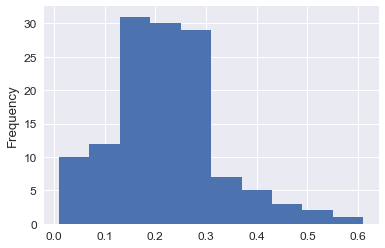

In [485]:
import matplotlib.pyplot as plt
Echocardiogram_df ['fractional_shortening'].plot('hist')
plt.show()

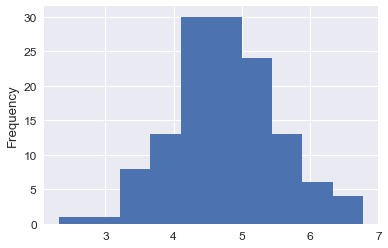

In [486]:
import matplotlib.pyplot as plt
Echocardiogram_df ['left_ventricular_end_diastolic'].plot("hist")
plt.show()


An outlier is not necessary a value which stands away from the mean but is a value which was added wrongly to your data. This is a medical report.I am not going to change columns age_at_heart_attack,pericardial_effusion, survival, wall_motion_index. I am going to remove the outliers from below columns which could have been added wrongly.



'FRACTIONAL_SHORTENING' - lower numbers are increasingly abnormal 'LEFT_VENTRICULAR_END_DIASTOLIC -Size of heart

In [487]:
def outliers(data):
    q1 =np.percentile(data,25)
    q3 = np.percentile(data,75)
    lower = q1-1.5*(q3-q1)
    upper = q1 + 1.5*(q3-q1)
    flag = (data <= lower) |(data>= upper)
    q2 = np.median(data)
    data [flag] = q2
    return (data)

Echocardiogram_df ['fractional_shortening'] = outliers (Echocardiogram_df ['fractional_shortening'])
Echocardiogram_df ['left_ventricular_end_diastolic']= outliers (Echocardiogram_df ['left_ventricular_end_diastolic'])
                       

<function matplotlib.pyplot.show>

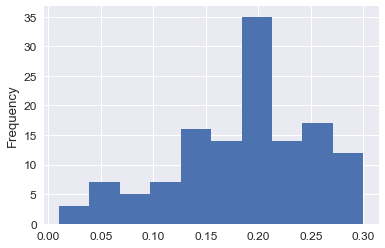

In [488]:
import matplotlib.pyplot as plt
Echocardiogram_df ['fractional_shortening'].plot('hist')
plt.show
# changed the range from 0 - .06 to 0 to .3 as shown in the graph.

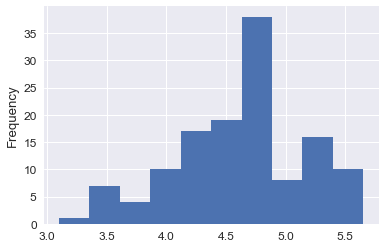

In [489]:
import matplotlib.pyplot as plt
Echocardiogram_df ['left_ventricular_end_diastolic'].plot('hist')
plt.show()

Now we can see from the graph, outliers has been removed from columns

In [490]:
Echocardiogram_df.head(2)

,survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,left_ventricular_end_diastolic,wall_motion_index,still_alive
0,11.0,71.0,0.0,0.260,4.6,1.0,0.0
1,19.0,72.0,0.0,0.205,4.1,1.7,0.0



As I noticing this data, I see some problems. All patients have different information in each row. Now I want to comare apple vs apple and not apple vs orange. To compare apple vs apple, I need to have all the data on the same scale. In other word, I need to count the frequency of occurrence of the same phenomena, so I have to have the same scale. This will help me to get more accuracy on predicted data. so I realize the first thing I have to do is normalize the data. To normilize the data, I am using Minmax function.

I am going to use this function on 3 columns fractional_shortening, left_ventricular_end_diastolic, wall_motion_index

In [491]:

x= np.ravel(Echocardiogram_df ['fractional_shortening'])
X= pd.DataFrame(x)
data =  MinMaxScaler().fit_transform(X)
Echocardiogram_df ['fractional_shortening']=data
print(Echocardiogram_df ['fractional_shortening'].head())

0    0.862069
1    0.672414
2    0.862069
3    0.837931
4    0.517241
Name: fractional_shortening, dtype: float64


In [492]:

x= np.ravel(Echocardiogram_df ['left_ventricular_end_diastolic'])
X= pd.DataFrame(x)
data =  MinMaxScaler().fit_transform(X)
Echocardiogram_df ['left_ventricular_end_diastolic']=data
print(Echocardiogram_df ['left_ventricular_end_diastolic'].head())

0    0.588235
1    0.392157
2    0.125490
3    0.589412
4    0.641176
Name: left_ventricular_end_diastolic, dtype: float64


In [493]:

x= np.ravel(Echocardiogram_df ['wall_motion_index'])
X= pd.DataFrame(x)
data =  MinMaxScaler().fit_transform(X)
Echocardiogram_df ['wall_motion_index']=data
print(Echocardiogram_df ['wall_motion_index'].head())

0    0.000
1    0.350
2    0.000
3    0.225
4    0.625
Name: wall_motion_index, dtype: float64


In [494]:
Echocardiogram_df.head(5).round(3)

,survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,left_ventricular_end_diastolic,wall_motion_index,still_alive
0,11.0,71.0,0.0,0.862,0.588,0.000,0.0
1,19.0,72.0,0.0,0.672,0.392,0.350,0.0
2,16.0,55.0,0.0,0.862,0.125,0.000,0.0
3,57.0,60.0,0.0,0.838,0.589,0.225,0.0
4,19.0,57.0,0.0,0.517,0.641,0.625,1.0


Now let see data from first 2 columns. It is hard for me to find the relation between these 2 columns due to large number of unique value in each column.

In [495]:

np.sort(Echocardiogram_df ['survival'].unique())

array([  3.00000000e-02,   2.50000000e-01,   5.00000000e-01,
         7.50000000e-01,   1.00000000e+00,   1.25000000e+00,
         2.00000000e+00,   3.00000000e+00,   4.00000000e+00,
         5.00000000e+00,   7.00000000e+00,   7.50000000e+00,
         9.00000000e+00,   1.00000000e+01,   1.10000000e+01,
         1.20000000e+01,   1.30000000e+01,   1.50000000e+01,
         1.60000000e+01,   1.70000000e+01,   1.90000000e+01,
         1.95000000e+01,   2.00000000e+01,   2.10000000e+01,
         2.20000000e+01,   2.30000000e+01,   2.40000000e+01,
         2.50000000e+01,   2.60000000e+01,   2.70000000e+01,
         2.80000000e+01,   2.90000000e+01,   3.10000000e+01,
         3.20000000e+01,   3.30000000e+01,   3.40000000e+01,
         3.50000000e+01,   3.60000000e+01,   3.70000000e+01,
         3.80000000e+01,   4.00000000e+01,   4.10000000e+01,
         4.40000000e+01,   4.50000000e+01,   4.60000000e+01,
         4.70000000e+01,   4.80000000e+01,   4.90000000e+01,
         5.00000000e+01,


Let's reduce this range appling the binning to get more accuracy on the result.

In [496]:
def data_binning(data):
    NB =5
    x= np.ravel(data)
    X= pd.DataFrame(x)
    bounds = np.linspace(np.min(x), np.max(x), NB + 1) 

    bounds = np.linspace(np.min(x), np.max(x), NB + 1)
    print (bounds)

    def bin(x, b): 
        nb = len(b)
        N = len(x)
        y = np.empty(N, int) 

        for i in range(1, nb):
            y[(x >= bounds[i-1])&(x < bounds[i])] = i

        y[x == bounds[-1]] = nb - 1
        return y

    bx = bin(x, bounds)
    print ("\n\nBinned variable x, for ", NB, "bins\n")
    print ("Bin boundaries: ", bounds)
    print ("Binned variable: ", bx)
    data = bx

In [497]:
data_binning(Echocardiogram_df['age_at_heart_attack'])

[ 35.   45.2  55.4  65.6  75.8  86. ]


Binned variable x, for  5 bins

Bin boundaries:  [ 35.   45.2  55.4  65.6  75.8  86. ]
Binned variable:  [4 4 2 3 3 4 3 3 2 2 5 3 4 3 3 2 4 3 4 4 4 5 4 4 3 2 1 2 4 2 3 2 2 3 3 3 3
 4 5 2 4 5 3 4 3 5 3 3 3 3 3 3 3 4 3 3 4 4 5 4 4 3 4 2 2 4 3 5 5 3 3 3 2 2
 4 3 3 3 3 2 3 5 3 2 4 4 2 3 4 3 3 2 3 3 4 3 3 3 2 4 4 3 3 3 3 3 5 3 3 4 3
 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 4 3 3]


In [498]:
data_binning(Echocardiogram_df['survival'])

[  3.00000000e-02   1.14240000e+01   2.28180000e+01   3.42120000e+01
   4.56060000e+01   5.70000000e+01]


Binned variable x, for  5 bins

Bin boundaries:  [  3.00000000e-02   1.14240000e+01   2.28180000e+01   3.42120000e+01
   4.56060000e+01   5.70000000e+01]
Binned variable:  [1 2 2 5 2 3 2 5 2 3 1 5 5 4 1 3 1 1 2 1 1 1 1 1 5 3 3 3 1 4 1 1 3 4 3 2 1
 2 3 3 2 4 5 1 4 2 2 1 1 1 1 2 1 1 4 2 5 4 3 1 3 1 2 5 1 5 5 4 1 3 3 4 3 2
 1 1 2 3 3 3 3 1 1 3 1 2 5 2 1 4 5 3 3 3 4 3 1 1 3 3 2 3 1 3 3 3 1 1 3 2 4
 3 3 3 4 3 3 3 2 4 3 2 4 2 2 1 4 4 2 2]


In [499]:
Echocardiogram_df.head(5).round(3)

,survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,left_ventricular_end_diastolic,wall_motion_index,still_alive
0,11.0,71.0,0.0,0.862,0.588,0.000,0.0
1,19.0,72.0,0.0,0.672,0.392,0.350,0.0
2,16.0,55.0,0.0,0.862,0.125,0.000,0.0
3,57.0,60.0,0.0,0.838,0.589,0.225,0.0
4,19.0,57.0,0.0,0.517,0.641,0.625,1.0



I found my data.Next step is apply data science model.Now In order to build a model, the features must be numeric, and every observation must have the same features in the same order. Let's visualize the data first.to get the more ideas about columns.

In the below graph I can clearly see that still_alive patients have less fractional_shortening number and high LVED

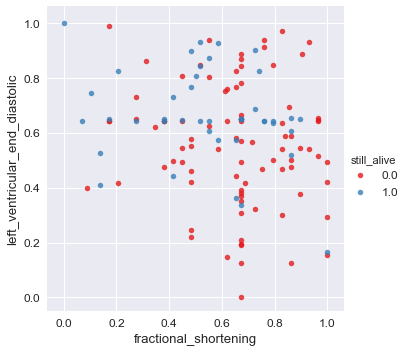

In [500]:
# package for visuals
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set(font_scale =1.2)

#Allow charts to appears in the notebook
%matplotlib inline
sns.lmplot('fractional_shortening','left_ventricular_end_diastolic',  data=Echocardiogram_df, hue='still_alive',
           palette='Set1', fit_reg=False, scatter_kws={"s": 30});

In below graph, i can clearly see most the points are collected to the one part of the graph. This is another way to indicate that these columns are playing important role in the model.

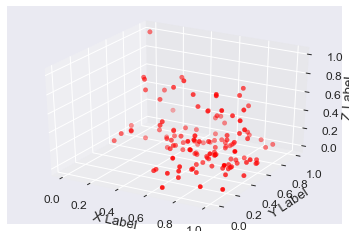

In [501]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =(Echocardiogram_df ['fractional_shortening'])
y =(Echocardiogram_df ['left_ventricular_end_diastolic'])
z =(Echocardiogram_df ['wall_motion_index'])

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

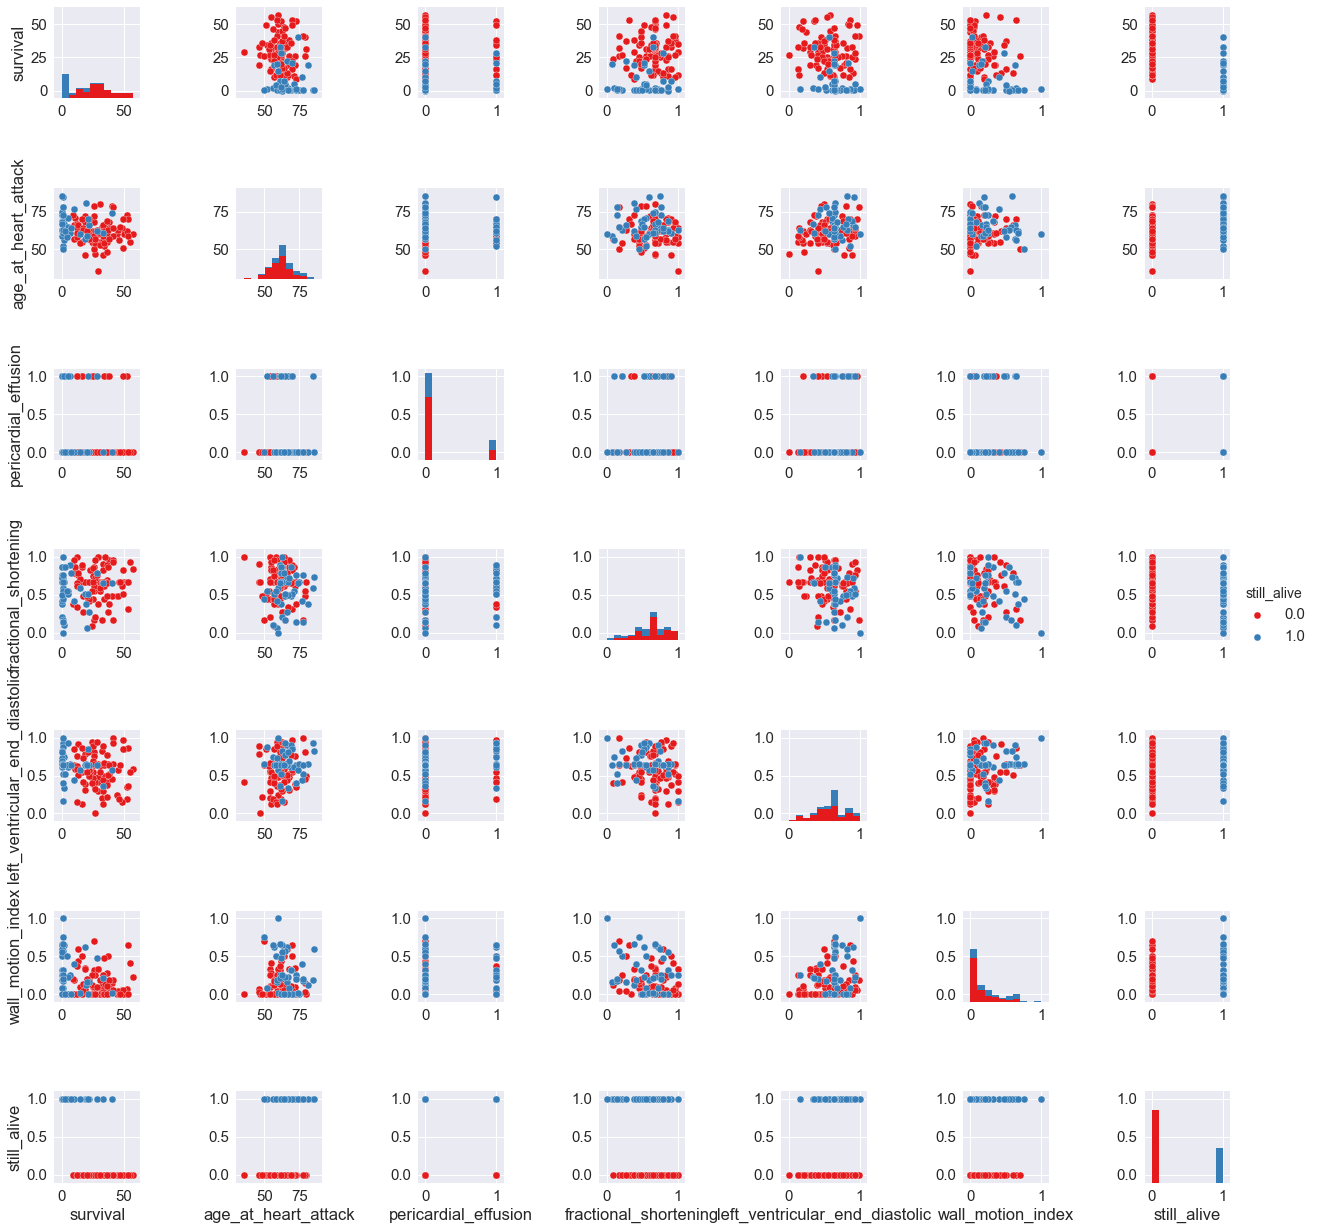

In [502]:

import matplotlib.pyplot as plt
import seaborn as sb
# visualize the relationship between the features and the response using scatterplots
sb.set(font_scale=1.5)
sb.pairplot(Echocardiogram_df, hue ="still_alive", palette ='Set1')
plt.show()


Now 2 part - Apply a data science model

I know that I need to use Supervised learning.

My main Question was "How do I choose which below model to use for my supervised learning task?"

- Support Vector Machines
- linear regression 
- logistic regression
- naive Bayes 
- decision trees
- k-nearest neighbor algorithm

Solution: Model evaluation procedures - It helps to find the best model that represents our data and how well the chosen model will work in the future.

Let's start:

Stage 1: The first Requirement is "Features and response are separate objects" So let's Define the input features and target column

In [503]:
# define X and y
#X= Echocardiogram_df[['survival','age_at_heart_attack','pericardial_effusion','fractional_shortening','left_ventricular_end_diastolic', 'wall_motion_index']].as_matrix()
#y= Echocardiogram_df['still_alive']

X = Echocardiogram_df.iloc[:,0:6].values
y = Echocardiogram_df.iloc[:,6].values
##Features and response should have same number of observations. 

print(X.shape)
print(y.shape)

(130, 6)
(130,)


Second stage:

Split the dataset into two pieces: a training set and a testing set. Train the model on the training set. Test the model on the testing set, and evaluate how well we did.

Advantage : train/test split is useful because of its flexibility and speed

In [504]:
#We will split the data set into Training and Testing sets Spliting data in 70% training and 30% testing set
# split X and y into training and testing sets

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size =.3)

print("Training sample having dimesions===")
print(X_train.shape)

print("Testing sample having dimensions=====")

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

Training sample having dimesions===
(91, 6)
Testing sample having dimensions=====
(39, 6)
(91,)
(39,)


In [505]:
Echocardiogram_df.shape 

(130, 7)

How to apply Model?
- Step 1. Import the model you want to use
- Step 2. Make an instance of the Model
- Step 3. Training the model on the data, storing the information learned from the data
- Step 4. Predict labels for new data (new images)

Appling Model -KNN Make an instance of Estimator

In [506]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [507]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [508]:
y_knn_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_knn_pred))

0.846153846154


In [509]:
#Repeat for KNN with K=1:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_knn_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
0.846153846154


In [510]:

#Repeat for KNN with K=2:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
print(knn)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_knn_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
0.846153846154


Accuracy is better with K = 2 so we can use K=2 to predict the target in our dataset. But what if you have big data? For KNN models, complexity is determined by the value of K (lower value = more complex). Let's see if we can use other function to determine the value of K

See if we can locate value for K using function?

In [511]:
# try K=1 through K=25 and record testing accuracy
k_range = list (range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train, y_train )
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_knn_pred))

Text(0,0.5,'Testing Accuracy')

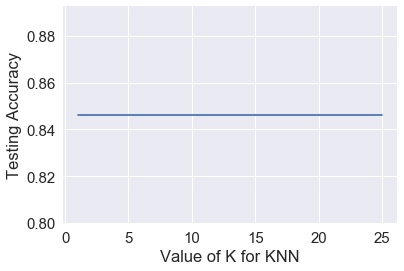

In [512]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Graph shows that I can pick number 4 or 6. let's take K = 4

In [513]:
#Repeat for KNN with K=6:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
print(knn)
knn.fit(X_train,y_train)
y_knn_pred_class = knn.predict(X_test)
print(accuracy_score(y_test, y_knn_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')
0.846153846154


In [514]:
# Create a function to guess when a patient is alive or dead with KNN
def Alive_or_Dead(survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index):
    
    if(knn.predict([[survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index]]))==0:
        print('You\'re looking at a Alive person!')
    else:
        print('You\'re looking at a Dead person!')
# Predict if person is alive or not
Alive_or_Dead(3,1,.1,.448,.22,.135)

You're looking at a Alive person!


In [515]:

# compare actual response values (y_test) with predicted response values (y_pred)
AR =accuracy_score(y_test, y_knn_pred)
print(AR)

0.846153846154


In [516]:

print(confusion_matrix(y_test, y_knn_pred))

CM_log = confusion_matrix(y_test, y_knn_pred)

TN, FP, FN, TP = CM_log.ravel()
print(TN, FP, FN, TP )

[[29  1]
 [ 5  4]]
29 1 5 4


In [517]:

#Classification Accuracy: Overall, how often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_knn_pred))

0.846153846154
0.846153846154


In [518]:
#Classification Error: Overall, how often is the classifier incorrect?

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, y_pred))

0.153846153846
0.230769230769


In [519]:

#Sensitivity: When the actual value is positive, how often is the prediction correct?
#How "sensitive" is the classifier to detecting positive instances?
print(TP / float(TP + FN))
print(recall_score(y_test, y_knn_pred))

0.444444444444
0.444444444444


In [520]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(precision_score(y_test, y_knn_pred))

0.8
0.8



ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

In [521]:

print(roc_auc_score(y_test,y_knn_pred))

0.705555555556


In [522]:

#f1_score
print(f1_score(y_test, y_knn_pred))

0.571428571429


In [523]:
# Store the predicted probabilities for class 1
y_knn_pred_prob = knn.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[ 0.26425336  0.34632683  0.43813422  0.35176802  0.4881018   0.18207178
  0.1802863   0.39991596  0.10867148  0.47949644  0.66306687  0.0971994
  0.20499156  0.67488626  0.30109925  0.43661689  0.68449512  0.29633786
  0.34135049  0.14958811  0.33990574  0.16083303  0.45478103  0.17323991
  0.1888551   0.23462784  0.60842825  0.07263854  0.40353135  0.54373345
  0.24000557  0.18250488  0.23403529  0.06181539  0.15600202  0.55529727
  0.38516545  0.06438863  0.40427235]



TP rates: [ 0.44  0.44  0.44  0.89  1.  ]

FP rates: [ 0.    0.03  0.13  0.6   1.  ]

Probability thresholds: [ 1.    0.5   0.33  0.17  0.  ]


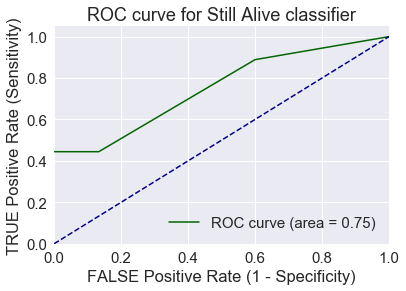


AUC score (using auc function): 0.75

AUC score (using roc_auc_score function): 0.82 



In [524]:

# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color

fpr, tpr, th = roc_curve(y_test, y_knn_pred_prob) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))
#####################

plt.figure()
plt.title('ROC curve for Still Alive classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate (1 - Specificity)')
plt.ylabel('TRUE Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

####################

print ("\nAUC score (using auc function):", np.round(AUC, 2))
print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(y_test, y_pred_prob), 2), "\n")


#### Using a different classification model --Linear regression

Linear regression is a simple machine learning method that you can use to predict an observation's value based on the relationship between the target variable and independent, linearily related numeric predictive features.

In [525]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
# train a logistic regression model on the training set
logreg = LogisticRegression()
# fit the model with data --Model is learning the relationship between X and y
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [526]:
#  make predictions on the testing set
y_lin_pred = logreg.predict(X_test)
print(y_lin_pred)

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.
  0.  0.  0.]


Classification accuracy: percentage of correct predictions

In [527]:

# compare actual response values (y_test) with predicted response values (y_pred)
AR =accuracy_score(y_test, y_lin_pred)
print(AR)

0.769230769231


In [528]:
# each row of this matrix corresponds to each one of the classes of the dataset
print ("Coefficients:")
print (logreg.coef_)

Coefficients:
[[-0.1955044   0.05267193  0.19535059 -0.86803003 -0.11900225 -0.06169775]]


In [529]:
# each element of this vector corresponds to each one of the classes of the dataset
print ("Intercept:")
print (logreg.intercept_)

Intercept:
[-0.154117]


In [530]:
1# print the first 15 true and predicted responses
from __future__ import print_function
print('True:', y_test[0:15])
print('Pred:', y_pred[0:15])

True: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.]
Pred: [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.]


Classification accuracy is the easiest classification metric to understand but it does not tell you what "types" of errors your classifier is making. so we are using the Table that describes the performance of a classification model called as Confusion matrix.

In [531]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(confusion_matrix(y_test, y_lin_pred))

[[26  4]
 [ 5  4]]


In [532]:
CM_log = confusion_matrix(y_test, y_lin_pred)

TN, FP, FN, TP = CM_log.ravel()
print(TN, FP, FN, TP)

26 4 5 4


In [533]:
#Classification Accuracy: Overall, how often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_lin_pred))

0.769230769231
0.769230769231


In [534]:
#Classification Error: Overall, how often is the classifier incorrect?

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, y_lin_pred))

0.230769230769
0.230769230769


In [535]:

#Sensitivity: When the actual value is positive, how often is the prediction correct?
#How "sensitive" is the classifier to detecting positive instances?
print(TP / float(TP + FN))
print(recall_score(y_test, y_lin_pred))

0.444444444444
0.444444444444


In [536]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(precision_score(y_test, y_lin_pred))

0.5
0.5


In [537]:
#f1_score
print(f1_score(y_test, y_lin_pred))

0.470588235294


In [538]:

# Store the predicted probabilities for class 1
y_lin_pred_prob = logreg.predict_proba(X_test)[:, 1]


ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

IMPORTANT: first argument is true values,second argument is predicted probabilities

In [539]:

print(roc_auc_score(y_test, y_lin_pred_prob))

0.851851851852



TP rates: [ 0.11  0.44  0.44  0.56  0.56  0.78  0.78  0.89  0.89  1.    1.  ]

FP rates: [ 0.    0.    0.13  0.13  0.23  0.23  0.27  0.27  0.47  0.47  1.  ]

Probability thresholds: [ 0.95  0.88  0.56  0.47  0.38  0.25  0.24  0.19  0.06  0.05  0.  ]


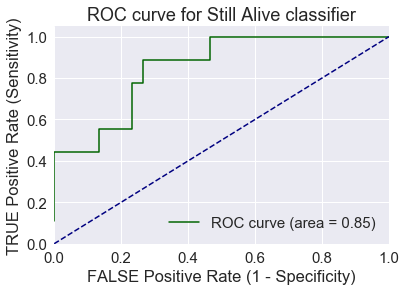


AUC score (using auc function): 0.85

AUC score (using roc_auc_score function): 0.82 



In [540]:
# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color

fpr, tpr, th = roc_curve(y_test,y_lin_pred_prob) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))
#####################

plt.figure()
plt.title('ROC curve for Still Alive classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate (1 - Specificity)')
plt.ylabel('TRUE Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

####################

print ("\nAUC score (using auc function):", np.round(AUC, 2))
print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(y_test, y_pred_prob), 2), "\n")

In [541]:

# Create a function to guess when a patient is alive or dead using Linear model
def Alive_or_Dead(survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index):
    
    if(logreg.predict([[survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index]]))==0:
        print('You\'re looking at a Alive person!')
    else:
        print('You\'re looking at a Dead person!')
# Predict if person is alive or not
Alive_or_Dead(3,1,.1,.448,.22,.135)

You're looking at a Alive person!


In [542]:

from sklearn.svm import SVC, LinearSVC
from sklearn import svm
# Choice of classifier with parameters
t = 0.001 # tolerance parameter
kp = 'rbf' # kernel parameter
clf = svm.SVC(kernel='linear', probability=True)
#clf = SVC(kernel='linear', tol=t, probability=True,C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3)
Still_alive = clf.fit(X_train, y_train)
print(Still_alive)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [543]:

# Create a function to guess when a patient is alive or dead using SVC model
def Alive_or_Dead(survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index):
    
    if(clf .predict([[survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index]]))==0:
        print('You\'re looking at a Alive person!')
    else:
        print('You\'re looking at a Dead person!')
# Predict if person is alive or not
Alive_or_Dead(3,1,.1,.448,.22,.135)

You're looking at a Dead person!


In [544]:
# make class predictions for X_test_dtm
print ("predictions for test set:")
y_SVC_pred = clf.predict(X_test)
print(y_SVC_pred)
print ('actual class values:')
print (y_test)

predictions for test set:
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.
  0.  0.  0.]
actual class values:
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  1.  0.  1.]


In [545]:

#calculate accuracy of class predictions
AR = accuracy_score(y_test, y_SVC_pred)
print(AR)

0.794871794872


In [546]:
# each row of this matrix corresponds to each one of the classes of the dataset
print ("Coefficients:")
print (clf.coef_)

Coefficients:
[[-0.12558733  0.00907271  0.1946628  -0.77880981 -0.17696493 -0.58498968]]


In [547]:
# each element of this vector corresponds to each one of the classes of the dataset
print ("Intercept:")
print (clf.intercept_)

Intercept:
[ 1.54263172]


In [548]:

# print the first 15 true and predicted responses
from __future__ import print_function
print('True:', y_test[0:15])
print('Pred:', y_pred[0:15])

True: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.]
Pred: [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.]


In [549]:

# print the confusion matrix
confusion_matrix(y_test, y_SVC_pred)

array([[27,  3],
       [ 5,  4]], dtype=int64)

In [550]:
# print message text for the false negatives (spam incorrectly classified as ham)
print(X_test[y_SVC_pred < y_test])

[[  2.00000000e+01   5.90000000e+01   0.00000000e+00   6.89655172e-02
    6.41176471e-01   1.55000000e-01]
 [  1.90000000e+01   5.70000000e+01   0.00000000e+00   5.17241379e-01
    6.41176471e-01   6.25000000e-01]
 [  2.80000000e+01   6.20000000e+01   1.00000000e+00   7.93103448e-01
    6.41176471e-01   4.75000000e-01]
 [  2.10000000e+01   7.00000000e+01   1.00000000e+00   5.17241379e-01
    8.43137255e-01   0.00000000e+00]
 [  1.95000000e+01   8.10000000e+01   0.00000000e+00   3.79310345e-01
    6.50980392e-01   1.25000000e-01]]


In [551]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_SVC_pred_prob = clf.predict_proba(X_test)[:, 1]
y_SVC_pred_prob


array([ 0.15114613,  0.27970113,  0.46902292,  0.29034756,  0.57284849,
        0.06212492,  0.06069115,  0.38948061,  0.01905276,  0.55516756,
        0.85707758,  0.01474452,  0.08236443,  0.870096  ,  0.20592873,
        0.46583307,  0.88008328,  0.19835248,  0.27007791,  0.04040793,
        0.26730563,  0.04810199,  0.5       ,  0.05758831,  0.06775809,
        0.11374813,  0.78443233,  0.00764551,  0.39686361,  0.67985844,
        0.12008774,  0.06247577,  0.11306177,  0.00534837,  0.04469327,
        0.70041323,  0.35986563,  0.00585176,  0.39838217])

In [552]:
#calculate AUC
roc_auc_score(y_test, y_SVC_pred_prob)

0.81851851851851853

In [553]:

#Sensitivity: When the actual value is positive, how often is the prediction correct?
#How "sensitive" is the classifier to detecting positive instances?
print(recall_score(y_test, y_SVC_pred))

0.444444444444



TP rates: [ 0.11  0.44  0.44  0.56  0.56  0.78  0.78  0.89  0.89  1.    1.  ]

FP rates: [ 0.    0.    0.23  0.23  0.27  0.27  0.33  0.33  0.53  0.53  1.  ]

Probability thresholds: [ 0.88  0.78  0.47  0.4   0.4   0.36  0.28  0.27  0.11  0.11  0.01]


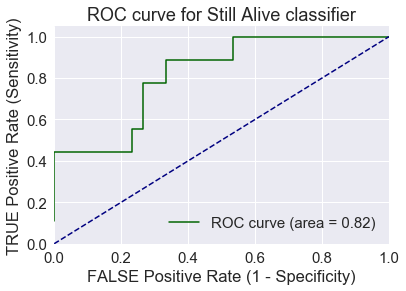


AUC score (using auc function): 0.82

AUC score (using roc_auc_score function): 0.82 



In [554]:

# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color

fpr, tpr, th = roc_curve(y_test, y_SVC_pred_prob) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))
#####################

plt.figure()
plt.title('ROC curve for Still Alive classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate (1 - Specificity)')
plt.ylabel('TRUE Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

####################

print ("\nAUC score (using auc function):", np.round(AUC, 2))
print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(y_test, y_pred_prob), 2), "\n")

In [555]:
#Compare classification accuracy
#Calculate classification accuracy
from sklearn import metrics
# Classification accuracy of logistic regression
print(metrics.accuracy_score(y_test,y_pred))

# Classification accuracy of KNN
print(metrics.accuracy_score(y_test,y_knn_pred_class))

# Classification accuracy of SVC
print(metrics.accuracy_score(y_test,y_SVC_pred))



0.769230769231
0.871794871795
0.794871794872


For Classifier  Logistic Regression :

TP rates: [ 0.    0.44  1.  ]

FP rates: [ 0.    0.13  1.  ]

Probability thresholds: [ 2.  1.  0.] 


For Classifier  k Nearest Neighbors :

TP rates: [ 0.44  1.  ]

FP rates: [ 0.  1.]

Probability thresholds: [ 1.  0.] 


For Classifier  Support vector :

TP rates: [ 0.    0.44  1.  ]

FP rates: [ 0.   0.1  1. ]

Probability thresholds: [ 2.  1.  0.] 




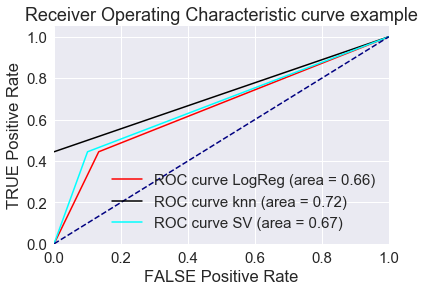

In [556]:
 

##ROC Analysis for all Classifiers
# Parameters for the AUC Plot
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC1 = 'red' # Line Color 
LC2 = 'blue' # Line Color 
LC3 = 'orange' # Line Color 
LC4 = 'black' # Line Color 
LC5 = 'cyan' # Line Color 
LC6 = 'green' # Line Color 

def getAUCScore(testdata,preddata,classifiername):
    fpr, tpr, th = roc_curve(testdata, preddata) # False Positive Rate, True Positive Rate, probability thresholds
    AUC = auc(fpr, tpr)
    print ("For Classifier ",classifiername,":")
    print ("\nTP rates:", np.round(tpr, 2))
    print ("\nFP rates:", np.round(fpr, 2))
    print ("\nProbability thresholds:", np.round(th, 2),'\n\n')
    return fpr, tpr, th, AUC

fpr_logreg, tpr_logreg, th_logreg, AUC_logreg = getAUCScore(y_test, y_lin_pred, "Logistic Regression")
fpr_knn, tpr_knn, th_knn, AUC_knn = getAUCScore(y_test, y_knn_pred_class, "k Nearest Neighbors")
fpr_sv, tpr_sv, th_sv, AUC_sv = getAUCScore(y_test, y_SVC_pred, "Support vector")




#Plot the Results of ROC Analysis/AUC Score
plt.figure()
plt.title('Receiver Operating Characteristic curve example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr_logreg, tpr_logreg, color=LC1,lw=LW, label='ROC curve LogReg (area = %0.2f)' % AUC_logreg)
plt.plot(fpr_knn, tpr_knn, color=LC4,lw=LW, label='ROC curve knn (area = %0.2f)' % AUC_knn)
plt.plot(fpr_sv, tpr_sv, color=LC5,lw=LW, label='ROC curve SV (area = %0.2f)' % AUC_sv)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for SVM
plt.legend(loc=LL)
plt.show()
####################


Let's collect the data and compare their results now.

- True positive: Still alive people correctly identified as Still alive.
- False positive: Dead people incorrectly identified as Alive
- True negative: Dead people correctly identified as dead
- IMP : False negative: Alive people incorrectly identified as Dead

In medical field, Still alive people incorrectly identified as dead is not acceptable. 

Because false positives ( Dead people incorrectly identified as Alive) are more acceptable than false negatives ( Alive people incorrectly identified as Dead)

sensitivity is important in this case. sensitivity for KNN is .72 sensitivity for LR is .66 Asensitivity for SVC is .67
Now I will check the accuracy. I will choose the KNN model in this case

What is best fit predictive model? 

We can clearly see from the above graph, **KNN** has the highest value of sensitivity. so it is best fit predictive model